In [31]:
## 기본 패키지 모음
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
## 전처리 및 모델링 준비를 위한 패키지
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
 
## 실제 모델링을 위한 패키지
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
 
## 모델 평가를 위한 패키지
from sklearn.metrics import classification_report
from sklearn import metrics
 


# WineQT.csv

In [87]:
wine = pd.read_csv('WineQT.csv')

In [88]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [75]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins,  labels = group_names)
 
# bad = 0, good = 1
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [76]:
wine['quality']

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int32

In [77]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,4


In [78]:
wine.drop(["Id"],axis=1,inplace=True)

In [79]:
##종속변수와 독립변수를 나누어주는 작업
x = wine.drop('quality', axis = 1)
y = wine['quality']
 
## 변수별로 Train과 Test 쓸 데이터 셋을 분류x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [80]:
## 측정 지표의 표준화. 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [81]:
## 모델의 선언
rfc = RandomForestClassifier(n_estimators=200)
 
## 학습데이터의 모델 적용
rfc.fit(x_train, y_train)
 
## 모델의 예측값 산출
pred_rfc = rfc.predict(x_test)
 
## 다양한 모델 평가 
print(classification_report(y_test, pred_rfc))
 
## 가장 기초적인 성적 평가 지표들
print("Accuracy:", metrics.accuracy_score(y_test, pred_rfc))
print("Precision:", metrics.precision_score(y_test, pred_rfc))
print("Recall:", metrics.recall_score(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       201
           1       0.64      0.32      0.43        28

    accuracy                           0.90       229
   macro avg       0.78      0.65      0.69       229
weighted avg       0.88      0.90      0.88       229

Accuracy: 0.8951965065502183
Precision: 0.6428571428571429
Recall: 0.32142857142857145


In [82]:
rfc.feature_importances_

array([0.0684249 , 0.12429994, 0.08916484, 0.06174511, 0.06956332,
       0.06263347, 0.07574125, 0.10617704, 0.06472078, 0.12408329,
       0.15344604])

In [83]:
df = pd.DataFrame({'feature': wine.columns[:11],'importance':rfc.feature_importances_})

In [84]:
df

,feature,importance
0,fixed acidity,0.068425
1,volatile acidity,0.124300
2,citric acid,0.089165
3,residual sugar,0.061745
4,chlorides,0.069563
5,free sulfur dioxide,0.062633
6,total sulfur dioxide,0.075741
7,density,0.106177
8,pH,0.064721
9,sulphates,0.124083


<BarContainer object of 11 artists>

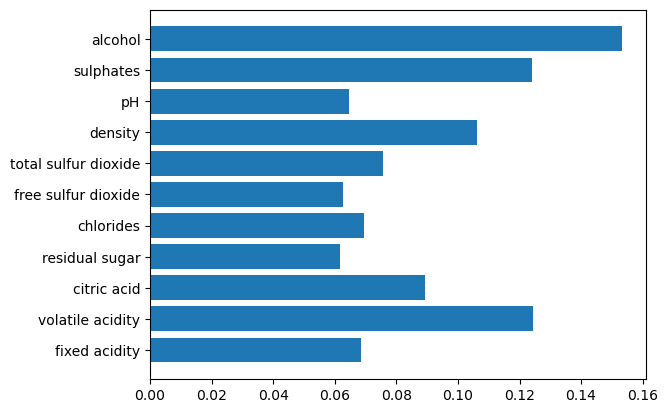

In [85]:
x = df.feature
y = df.importance


plt.barh(x, y)

# WineQT_add.csv

In [57]:
wine = pd.read_csv('WineQT_add.csv')

In [58]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins,  labels = group_names)
 
# bad = 0, good = 1 
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [59]:
wine['quality']

0       0
1       0
2       0
3       0
4       0
       ..
2737    0
2738    0
2739    0
2740    0
2741    0
Name: quality, Length: 2742, dtype: int32

In [60]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [64]:
##종속변수와 독립변수를 나누어주는 작업
x = wine.drop('quality', axis = 1)
y = wine['quality']
 
## 변수별로 Train과 Test 쓸 데이터 셋을 분류x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [65]:
## 측정 지표의 표준화. 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [66]:
## 모델의 선언
rfc = RandomForestClassifier(n_estimators=200)
 
## 학습데이터의 모델 적용
rfc.fit(x_train, y_train)
 
## 모델의 예측값 산출
pred_rfc = rfc.predict(x_test)
 
## 다양한 모델 평가 
print(classification_report(y_test, pred_rfc))
 
## 가장 기초적인 성적 평가 지표들
print("Accuracy:", metrics.accuracy_score(y_test, pred_rfc))
print("Precision:", metrics.precision_score(y_test, pred_rfc))
print("Recall:", metrics.recall_score(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       485
           1       0.89      0.78      0.83        64

    accuracy                           0.96       549
   macro avg       0.93      0.88      0.91       549
weighted avg       0.96      0.96      0.96       549

Accuracy: 0.9635701275045537
Precision: 0.8928571428571429
Recall: 0.78125


In [67]:
rfc.feature_importances_

array([0.07046124, 0.11888529, 0.08451302, 0.06712124, 0.07253458,
       0.05752321, 0.07528045, 0.10109974, 0.06442631, 0.11670794,
       0.17144697])

In [69]:
df = pd.DataFrame({'feature': wine.columns[:11],'importance':rfc.feature_importances_})

In [70]:
df

,feature,importance
0,fixed acidity,0.070461
1,volatile acidity,0.118885
2,citric acid,0.084513
3,residual sugar,0.067121
4,chlorides,0.072535
5,free sulfur dioxide,0.057523
6,total sulfur dioxide,0.075280
7,density,0.101100
8,pH,0.064426
9,sulphates,0.116708


<BarContainer object of 11 artists>

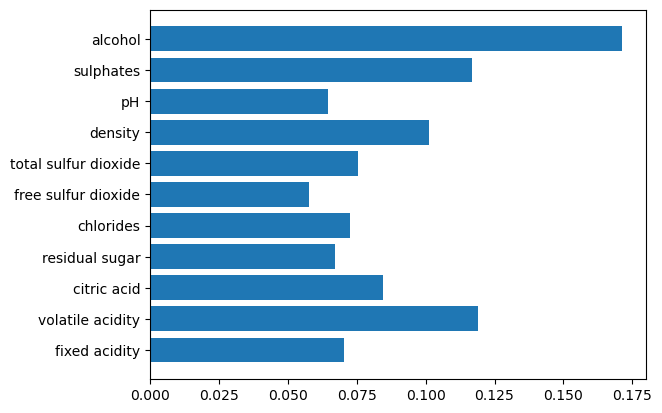

In [71]:
x = df.feature
y = df.importance


plt.barh(x, y)